In [1]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
tqdm.pandas()

c:\Users\scien\anaconda3\envs\smumitb\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Since the encoded file is considered to have more categorical variables, the original data set is used to perform the tests on DaysbetweenDeathandoperation

In [44]:
cares_data_path = "../data/CARES_data.csv"
data = pd.read_csv(cares_data_path)
data.head()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,2,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,5,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,6,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,9,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,10,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no


In [45]:
data[['Preoptransfusionwithin30days','Intraop','Postopwithin30days','Transfusionintraandpostop','DaysbetweenDeathandoperation']].isna().describe()

,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation
count,90785,90785,90785,90785,90785
unique,1,1,1,1,2
top,False,False,False,False,True
freq,90785,90785,90785,90785,85190


In [42]:
columns = ['Preoptransfusionwithin30days','Intraop','Postopwithin30days','Transfusionintraandpostop']
data = data[columns + ['DaysbetweenDeathandoperation']]
data.head()

,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation
0,0,0,0,0,NaN
1,0,0,0,0,NaN
2,0,0,0,0,NaN
3,0,1,0,1,NaN
4,0,0,0,0,59.0


In [48]:
data.columns

Index(['Indexno', 'AGE', 'GENDER', 'RCRI score', 'Anemia category',
       'PreopEGFRMDRD', 'GradeofKidneydisease', 'DaysbetweenDeathandoperation',
       '@30daymortality', 'Preoptransfusionwithin30days', 'Intraop',
       'Postopwithin30days', 'Transfusionintraandpostop', 'AnaestypeCategory',
       'PriorityCategory', 'TransfusionIntraandpostopCategory', 'AGEcategory',
       'AGEcategoryOriginal', 'Mortality', 'thirtydaymortality',
       'SurgRiskCategory', 'RaceCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory',
       'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h'],
      dtype='object')

In [53]:
df = data.drop(columns='Indexno')

In [59]:
all_columns = list(df.columns)
all_columns.remove('DaysbetweenDeathandoperation')

In [65]:
df_withoutTarget = df[all_columns]
df_withoutTarget.head()

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,48,FEMALE,NaN,NaN,NaN,BLANK,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,36,FEMALE,NaN,none,NaN,BLANK,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,64,FEMALE,NaN,mild,152.538570,g1,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,73,MALE,NaN,moderate,117.231496,g1,NO,0,1,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,73,MALE,0.0,mild,98.651255,g1,NO,0,0,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no


In [72]:
df_withoutTarget.drop_duplicates(inplace=True)

C:\Users\scien\AppData\Local\Temp\ipykernel_249128\2460440968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withoutTarget.drop_duplicates(inplace=True)


In [73]:
df_withoutTarget.shape

(78865, 30)

In [2]:
#cares_data_path = "../data/CARES_data.csv"
#data = pd.read_csv(cares_data_path)
#data.head()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,2,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,5,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,6,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,9,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,10,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no


In [74]:
df_withoutTarget.shape

(78865, 30)

In [75]:
df_withoutTarget.dtypes

AGE                                    int64
GENDER                                object
RCRI score                           float64
Anemia category                       object
PreopEGFRMDRD                        float64
GradeofKidneydisease                  object
@30daymortality                       object
Preoptransfusionwithin30days           int64
Intraop                                int64
Postopwithin30days                     int64
Transfusionintraandpostop              int64
AnaestypeCategory                     object
PriorityCategory                      object
TransfusionIntraandpostopCategory     object
AGEcategory                           object
AGEcategoryOriginal                   object
Mortality                             object
thirtydaymortality                    object
SurgRiskCategory                      object
RaceCategory                          object
CVARCRICategory                       object
IHDRCRICategory                       object
CHFRCRICat

In [69]:
df_withoutTarget.isna().sum()

AGE                                      0
GENDER                                   0
RCRI score                           27424
Anemia category                       4038
PreopEGFRMDRD                        10830
GradeofKidneydisease                     0
@30daymortality                          0
Preoptransfusionwithin30days             0
Intraop                                  0
Postopwithin30days                       0
Transfusionintraandpostop                0
AnaestypeCategory                        0
PriorityCategory                         0
TransfusionIntraandpostopCategory        0
AGEcategory                              0
AGEcategoryOriginal                      0
Mortality                                0
thirtydaymortality                       0
SurgRiskCategory                         0
RaceCategory                             0
CVARCRICategory                          0
IHDRCRICategory                          0
CHFRCRICategory                          0
DMinsulinRC

Checking normality using Shaprio-Wilk test:

H0: Distributions are normal <br>
H1: Distributions are not normal

In [76]:
df_withoutTarget

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,48,FEMALE,NaN,NaN,NaN,BLANK,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,36,FEMALE,NaN,none,NaN,BLANK,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,64,FEMALE,NaN,mild,152.538570,g1,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,73,MALE,NaN,moderate,117.231496,g1,NO,0,1,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,73,MALE,0.0,mild,98.651255,g1,NO,0,0,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90778,81,FEMALE,0.0,none,57.609630,G3a,NO,0,0,0,...,no,no,no,no,no,G3,NaN,<= 15.7,II,no
90779,46,MALE,NaN,NaN,NaN,BLANK,NO,0,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,yes,#NULL!,#NULL!,#NULL!,III,no
90780,66,FEMALE,2.0,mild,48.339582,G3a,NO,0,0,0,...,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
90781,50,MALE,1.0,moderate,126.592489,g1,NO,0,0,0,...,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no


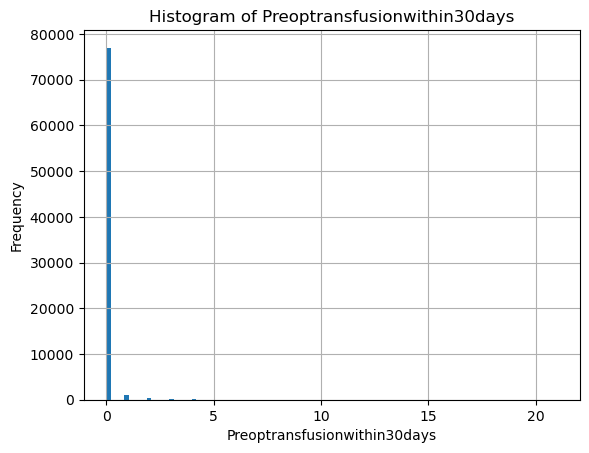

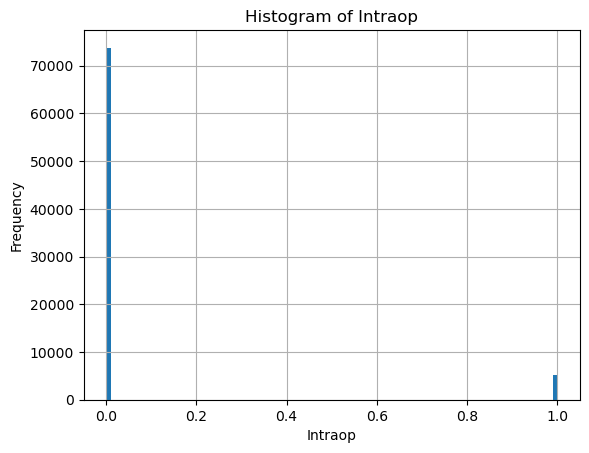

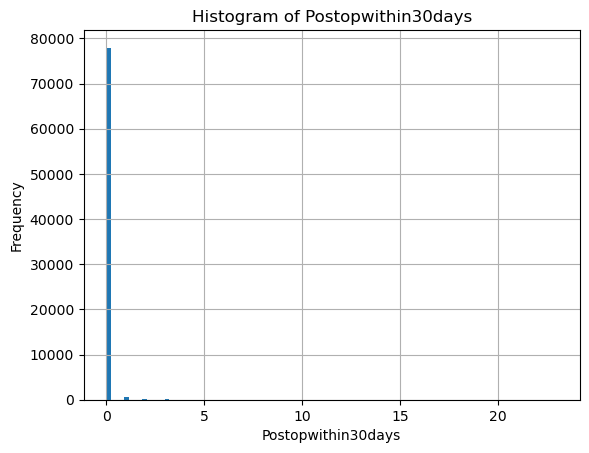

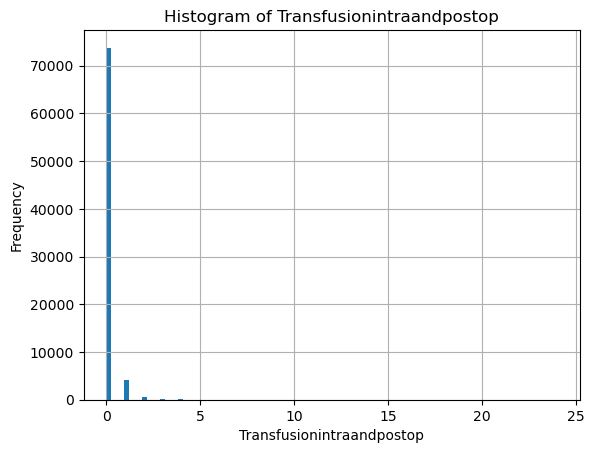

In [84]:
import matplotlib.pyplot as plt

# Select only the continuous variables
continuous_vars = ['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop']

# Plot histograms for each continuous variable
for var in continuous_vars:
    df_withoutTarget[var].hist(bins=100)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    # bin size as 1 
    
    plt.show()

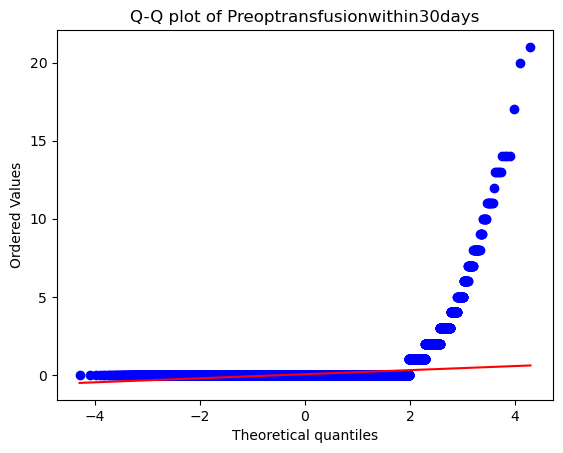

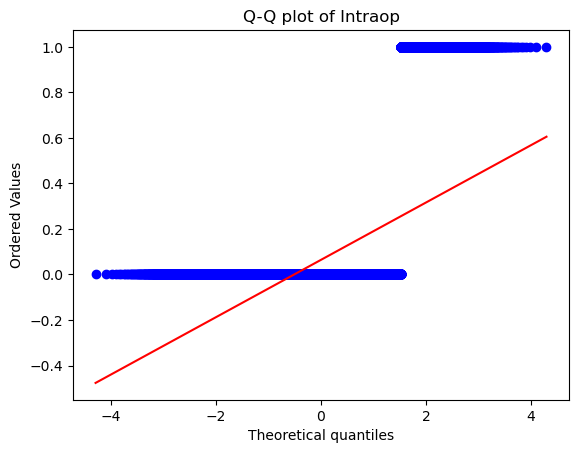

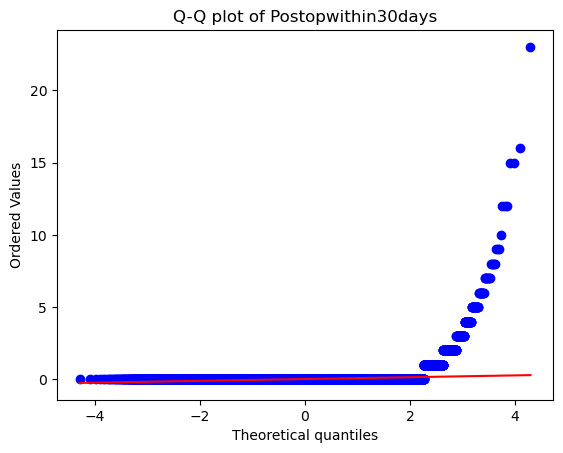

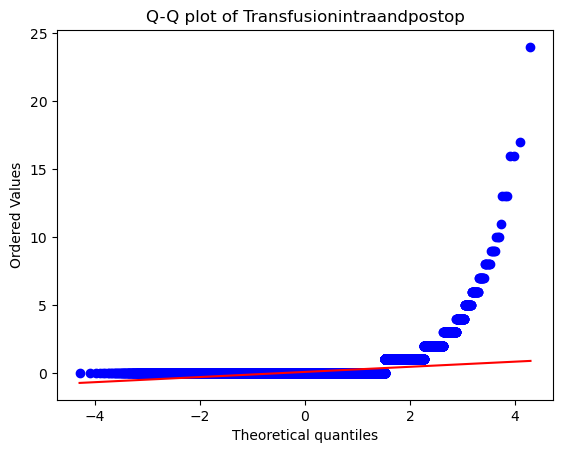

In [85]:
# check q-q plot for normality

import scipy.stats as stats

for var in continuous_vars:
    stats.probplot(df_withoutTarget[var], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {var}')
    plt.show()

In [87]:
# save

df.drop_duplicates(subset=all_columns).to_csv('../data/CARES_continuous.csv', index=False)

In [77]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on each variable
shapiro_preop = shapiro(df_withoutTarget['Preoptransfusionwithin30days'])
shapiro_intraop = shapiro(df_withoutTarget['Intraop'])
shapiro_postop = shapiro(df_withoutTarget['Postopwithin30days'])
shapiro_transfusion = shapiro(df_withoutTarget['Transfusionintraandpostop'])

# Print the results
print(f"Shapiro-Wilk test for Preoptransfusionwithin30days: W = {shapiro_preop.statistic}, p-value = {shapiro_preop.pvalue}")
print(f"Shapiro-Wilk test for Intraop: W = {shapiro_intraop.statistic}, p-value = {shapiro_intraop.pvalue}")
print(f"Shapiro-Wilk test for Postopwithin30days: W = {shapiro_postop.statistic}, p-value = {shapiro_postop.pvalue}")
print(f"Shapiro-Wilk test for Transfusionintraandpostop: W = {shapiro_transfusion.statistic}, p-value = {shapiro_transfusion.pvalue}")

Shapiro-Wilk test for Preoptransfusionwithin30days: W = 0.08968532085418701, p-value = 0.0
Shapiro-Wilk test for Intraop: W = 0.2631869912147522, p-value = 0.0
Shapiro-Wilk test for Postopwithin30days: W = 0.05059260129928589, p-value = 0.0
Shapiro-Wilk test for Transfusionintraandpostop: W = 0.19910770654678345, p-value = 0.0


c:\Users\scien\anaconda3\envs\smumitb\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value is <0.05 for all the variables, so we can reject the null hypothesis for all.

Due to this, ANOVA cannot be performed as the data is not normally distributed. Kruskal-Wallis is non-parametric and normality need not be assumed.

H0: The medians (or distributions) of the groups are equal. There is no significant difference between the groups. <br>
H1: At least one group differs in its distribution from the others.

In [40]:
import pandas as pd
from scipy.stats import kruskal

# Define the continuous variables
continuous_vars = [
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]

def perform_kruskal_wallis_with_binning(data, categorical_var, continuous_vars, bins, labels):
    # Bin the categorical variable
    data['binned_' + categorical_var] = pd.cut(data[categorical_var], bins=bins, labels=labels)
    
    # Filter the dataset to only include rows where the binned categorical variable is not NA
    data_filtered = data.dropna(subset=['binned_' + categorical_var])
    
    results = {}
    
    # Get the unique groups in the binned categorical variable
    groups = data_filtered['binned_' + categorical_var].unique()
    
    for var in continuous_vars:
        # Extract data for each group
        group_data = [data_filtered[data_filtered['binned_' + categorical_var] == group][var].dropna() for group in groups]
        
        # Perform Kruskal-Wallis test
        kruskal_result = kruskal(*group_data)
        
        # Store the results
        results[var] = {
            'H-statistic': kruskal_result.statistic,
            'p-value': kruskal_result.pvalue
        }
    
    return results

# Define the bins and labels
bins = list(range(0, 1830, 30))  # Create bins in increments of 30 up to 1800
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]  # Create labels for the bins

# Count the number of records in each bin
data['binned_DaysbetweenDeathandoperation'] = pd.cut(data['DaysbetweenDeathandoperation'], bins=bins, labels=labels)
bin_counts = data['binned_DaysbetweenDeathandoperation'].value_counts().sort_index()

# Display the bins and their corresponding counts
print("Number of records in each bin:")
for label, count in bin_counts.items():
    print(f"Bin '{label}': {count} records")

# Perform Kruskal-Wallis test
kruskal_wallis_results = perform_kruskal_wallis_with_binning(data, 'DaysbetweenDeathandoperation', continuous_vars, bins, labels)

# Print the results
print("\nKruskal-Wallis test results:")
for var, result in kruskal_wallis_results.items():
    print(f"Kruskal-Wallis test for {var}:")
    print(f"  H-statistic = {result['H-statistic']:.4f}")
    print(f"  p-value = {result['p-value']:.40f}")
    print("-" * 40)


Number of records in each bin:
Bin '0-29': 518 records
Bin '30-59': 352 records
Bin '60-89': 246 records
Bin '90-119': 256 records
Bin '120-149': 221 records
Bin '150-179': 199 records
Bin '180-209': 197 records
Bin '210-239': 190 records
Bin '240-269': 168 records
Bin '270-299': 150 records
Bin '300-329': 160 records
Bin '330-359': 145 records
Bin '360-389': 116 records
Bin '390-419': 145 records
Bin '420-449': 132 records
Bin '450-479': 127 records
Bin '480-509': 114 records
Bin '510-539': 100 records
Bin '540-569': 113 records
Bin '570-599': 109 records
Bin '600-629': 103 records
Bin '630-659': 86 records
Bin '660-689': 77 records
Bin '690-719': 79 records
Bin '720-749': 88 records
Bin '750-779': 75 records
Bin '780-809': 74 records
Bin '810-839': 73 records
Bin '840-869': 73 records
Bin '870-899': 72 records
Bin '900-929': 58 records
Bin '930-959': 59 records
Bin '960-989': 64 records
Bin '990-1019': 64 records
Bin '1020-1049': 56 records
Bin '1050-1079': 64 records
Bin '1080-1109'

Interpretation:

For Kruskal Wallis, the dependent variable is a categorical variable. The test is done to check if the medians of the continuous against each category are equal. Since DaysbetweenDeathandoperation is originally continuous, the data is binned in increments of 30 days (to consider an avergae month). 

The p-value of each of the 4 continuous variables is <0.05 so the null hypothesis is rejected. There is a significant difference in all the considered continuous variables for each month.